## Singer Prediction-Main Work__Fundamental Freq

In [80]:
from __future__ import print_function
import os
from scipy.io.wavfile import read
import scipy.io.wavfile as wav
import subprocess as sp
import numpy as np
import argparse
import random
import os
import sys
from random import shuffle
import speechpy
import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
import numpy as np
import pylab as pyl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Predictor-Target Generation

In [81]:
dr="D:/As Freelancer/Projects/Speaker Recognition/wave/TRAIN/"
freqdata=pd.read_csv(dr+'Artist_Freq.csv')
try:
    freqdata=freqdata.drop('Unnamed: 0',axis=1)
except:
    pass

In [83]:
freqdata.head(12)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,Artist
0,511.5,516.9,21710.8,344.6,339.2,506.2,21549.2,21883.1,172.3,333.8,...,21759.2,296.2,20370.0,1685.4,21183.1,872.3,866.9,20348.5,1706.9,2
1,393.1,387.7,21667.7,382.3,188.5,86.2,263.8,592.3,183.1,398.5,...,20876.2,1179.2,22012.3,409.2,19702.3,2353.1,21980.0,2347.7,1173.8,7
2,215.4,210.0,188.5,204.6,193.8,156.2,414.6,2363.8,635.4,102.3,...,2977.7,495.4,592.3,19653.8,2401.5,102.3,102.3,102.3,102.3,3
3,468.5,242.3,479.2,21576.2,463.1,1394.6,247.7,226.2,20655.4,1400.0,...,21904.6,150.8,199.2,21856.2,355.4,215.4,20440.0,1615.4,21350.0,2
4,129.2,134.6,140.0,123.8,21958.5,96.9,80.8,21963.8,91.5,86.2,...,80.8,80.8,80.8,80.8,80.8,80.8,80.8,80.8,80.8,5
5,393.1,350.0,129.2,290.8,296.2,21667.7,387.7,118.5,344.6,339.2,...,414.6,403.8,91.5,91.5,91.5,91.5,91.5,91.5,91.5,4
6,21834.6,220.8,446.9,177.7,183.1,21872.3,215.4,193.8,21829.2,226.2,...,21414.6,640.8,538.5,21516.9,576.2,21479.2,21409.2,646.2,360.8,3
7,21883.1,172.3,861.5,215.4,166.9,21888.5,2606.2,19449.2,21899.2,156.2,...,19519.2,3726.2,18329.2,2563.1,210.0,490.0,21565.4,18873.1,3182.3,6
8,188.5,199.2,193.8,603.1,204.6,21468.5,586.9,576.2,21312.3,743.1,...,1330.0,231.5,210.0,21064.6,990.8,1103.8,226.2,96.9,96.9,3
9,21516.9,538.5,533.1,21533.1,522.3,166.9,21883.1,172.3,21511.5,543.8,...,20876.2,1179.2,20800.8,1254.6,737.7,1028.5,1281.5,21183.1,161.5,4


In [12]:
freqdata.shape

(143, 68)

In [18]:
X=audiodata.drop(['Artist'],axis=1)
y=audiodata['Artist']
X.shape

(143, 67)

In [14]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67
0,511.5,516.9,21710.8,344.6,339.2,506.2,21549.2,21883.1,172.3,333.8,...,1507.7,21759.2,296.2,20370.0,1685.4,21183.1,872.3,866.9,20348.5,1706.9
1,393.1,387.7,21667.7,382.3,188.5,86.2,263.8,592.3,183.1,398.5,...,306.9,20876.2,1179.2,22012.3,409.2,19702.3,2353.1,21980.0,2347.7,1173.8
2,215.4,210.0,188.5,204.6,193.8,156.2,414.6,2363.8,635.4,102.3,...,2229.2,2977.7,495.4,592.3,19653.8,2401.5,102.3,102.3,102.3,102.3
3,468.5,242.3,479.2,21576.2,463.1,1394.6,247.7,226.2,20655.4,1400.0,...,20671.5,21904.6,150.8,199.2,21856.2,355.4,215.4,20440.0,1615.4,21350.0
4,129.2,134.6,140.0,123.8,21958.5,96.9,80.8,21963.8,91.5,86.2,...,80.8,80.8,80.8,80.8,80.8,80.8,80.8,80.8,80.8,80.8


In [15]:
y.tail()

138    8
139    5
140    7
141    6
142    8
Name: Artist, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.0005, random_state=6)

In [20]:
len(X1)

142

In [21]:
try:
    X1=X1.drop('index',axis=1)
except:
    pass
X1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67
93,113.1,220.8,21807.7,247.7,204.6,107.7,21947.7,21953.1,102.3,96.9,...,554.6,4038.5,18016.9,3828.5,18226.9,4000.8,4130.0,3866.2,3936.2,18119.2
72,21468.5,586.9,576.2,285.4,269.2,290.8,21791.5,263.8,581.5,592.3,...,312.3,791.5,21263.8,1103.8,96.9,96.9,96.9,96.9,96.9,96.9
30,166.9,161.5,247.7,177.7,21565.4,490.0,18469.2,3586.2,484.6,667.7,...,2056.9,371.5,3343.8,350.0,3300.8,18754.6,549.2,2062.3,19993.1,3618.5
46,280.0,21899.2,156.2,656.9,662.3,21780.8,274.6,21893.8,161.5,328.5,...,20343.1,1712.3,441.5,21613.8,290.8,20230.0,1825.4,20445.4,1610.0,21915.4
87,123.8,134.6,118.5,140.0,21899.2,156.2,129.2,640.8,312.3,21743.1,...,193.8,204.6,21850.8,107.7,21705.4,350.0,791.5,21980.0,409.2,21759.2


In [177]:
len(X1)

143

### Count of Artist

In [53]:
def find_len(directory):
    import librosa
    import numpy as np
    import datetime
    print("Current Directory: ",directory)
    ln=[]
    auddetails=[]
    drlist=os.listdir(directory)
    music=[]
    ext=[".wav",".mp3"]
    for i in drlist:
        if i[-4:] in ext:
            music.append(i)
    #print(music)
    for i in range(len(music)):
        pk=[]
        # Load local audio file
        y, sr = librosa.load(directory+music[i])
        # Get file duration in seconds
        duration = librosa.get_duration(y)
        #print("Duration of {}th File=> {}".format(i,duration))
        # Print duration to console
        #print("File duration(s): ", str(datetime.timedelta(seconds=duration)))
        # Find peaks
        onset_env = librosa.onset.onset_strength(y=y, sr=sr,hop_length=512,aggregate=np.median)
        peaks = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)
        pk.append(librosa.frames_to_time(peaks, sr=sr))
        #print(len(pk[0]))
        ln.append(len(pk[0]))
        auddetails.append(list(pk[0]))
    return ln,auddetails,music

In [54]:
dr="D:/As Freelancer/Projects/Speaker Recognition/wave/TRAIN/"
maxpeak,details,artist=find_len(dr)
print(maxpeak)
maxl=max(maxpeak)
print(len(details))
artnames=[]
for i in artist:
    artnames.append(i[:-6].strip('-'))
art=np.unique(np.array(artnames))
print("Total Singers in Database {}".format(len(art)))
print("Singers: \n",art)
art_code=[i+1 for i in range(len(art))]
print(art_code)

Current Directory:  D:/As Freelancer/Projects/Speaker Recognition/wave/TRAIN/
[33, 33, 25, 24, 31, 28, 25, 23, 27, 31, 25, 24, 31, 28, 25, 23, 27, 31, 33, 33, 34, 29, 29, 19, 19, 33, 36, 32, 34, 29, 29, 19, 19, 33, 36, 32, 35, 35, 20, 29, 25, 24, 25, 34, 33, 34, 20, 29, 25, 24, 25, 34, 33, 34, 30, 30, 31, 28, 26, 27, 33, 32, 32, 30, 31, 28, 26, 27, 33, 32, 32, 30, 34, 34, 28, 32, 31, 36, 32, 31, 32, 32, 28, 32, 31, 36, 32, 31, 32, 32, 26, 26, 26, 29, 35, 31, 32, 24, 24, 24, 26, 29, 35, 31, 32, 24, 24, 24, 32, 32, 28, 30, 29, 31, 35, 24, 31, 32, 28, 30, 29, 31, 35, 24, 31, 32, 26, 26, 28, 30, 30, 29, 32, 24, 25, 25, 28, 30, 30, 29, 32, 24, 25, 25]
144
Total Singers in Database 8
Singers: 
 ['Arijit Singh' 'Gulam Ali' 'Kumar Sanu' 'Manna' 'Nusrat' 'Rafi'
 'Sonu Nigam' 'Udit Narayan']
[1, 2, 3, 4, 5, 6, 7, 8]


### Determining Hyper Parameter

In [22]:
rand_all=[]
scr_all=[]
match=[]

In [23]:
def match_found(pred,y_test):
    y_test_val=np.array(y_test)
    y_test_val_u=np.unique(y_test_val)
    cnt=[]
    for i in range(len(y_test_val_u)):
        cnt.append(y_test_val.tolist().count(y_test_val_u[i]))
    pred_val=np.array(pred)
    pred_val_u=np.unique(pred_val)
    cnt1=[]
    for i in range(len(pred_val_u)):
        cnt1.append(pred_val.tolist().count(pred_val_u[i]))
    return cnt1

#### Using Random Forest Classifier

In [24]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  40


#### Using Logistic Regression

In [25]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = LogisticRegression(solver='liblinear', max_iter=400, multi_class='auto')
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  32


#### Using Decision Tree Classifier

In [26]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  32


#### Using Naive Bayes

In [27]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 82.76%
Optimum Random State:  39


#### Using K-Nearest Neighbor

In [28]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 37.93%
Optimum Random State:  40


#### Using ANN

In [29]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.neural_network import MLPClassifier
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf = MLPClassifier()
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  40


#### Using Guassian Process Classifier

In [30]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    kernel = 1.0 * RBF(1.0)
    clf = GaussianProcessClassifier(kernel=kernel,random_state=0)
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  39


#### Using One Vs Rest Classifier

In [31]:
scr=[]
rand_st=[]
mtch=[]
for i in range(0,50):
    from sklearn.model_selection import train_test_split
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
    clf=OneVsRestClassifier(LinearSVC(random_state=0))
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    scr.append(clf.score(X_test,y_test))
    rand_st.append(i)
    mtch.append(match_found(pred,y_test))
match.append(mtch[scr.index(max(scr))])
max_state=rand_st[scr.index(max(scr))]
print("Optimum Score: %0.2f"%(max(scr)*100)+"%")
print("Optimum Random State: ",max_state)
rand_all.append(max_state)
scr_all.append(eval("%0.2f"%(max(scr)*100)))

Optimum Score: 100.00%
Optimum Random State:  32


#### Summery of Initial Score Checking

In [32]:
algos=['Random Forest Classifier','Logistic Regression','Decision Tree Classifier','Naive Bayes','K-Nearest Neighbor','MLP Classifier','Gaussian Process Classifier','One vs Rest Classifers']
print("Algorithms Checked as Follows: \n")
#print("Collection of all Optimum Obtained Score: ",scr_all)
#print("Collection of all Optimum Random States: ",rand_all)
algo=algos[scr_all.index(max(scr_all))]
rand_state=rand_all[scr_all.index(max(scr_all))]
for i in range(len(algos)):
    print("{}. Score for '{}' is {}% with Random State {}".format(i+1,algos[i],scr_all[i],rand_all[i]))
algos[scr_all.index(max(scr_all))]
print("Maximum Score Obtained from '{}' with Random State {}".format(algos[scr_all.index(max(scr_all))],rand_all[scr_all.index(max(scr_all))]))
#algos=['Original','Random Forest Classifier','Logistic Regression','Decision Tree Classifier','Naive Bayes','K-Nearest Neighbor','MLP Classifier','Gaussian Process Classifier','One vs Rest Classifers']

Algorithms Checked as Follows: 

1. Score for 'Random Forest Classifier' is 100.0% with Random State 40
2. Score for 'Logistic Regression' is 100.0% with Random State 32
3. Score for 'Decision Tree Classifier' is 100.0% with Random State 32
4. Score for 'Naive Bayes' is 82.76% with Random State 39
5. Score for 'K-Nearest Neighbor' is 37.93% with Random State 40
6. Score for 'MLP Classifier' is 100.0% with Random State 40
7. Score for 'Gaussian Process Classifier' is 100.0% with Random State 39
8. Score for 'One vs Rest Classifers' is 100.0% with Random State 32
Maximum Score Obtained from 'Random Forest Classifier' with Random State 40


In [33]:
for i in match:
    if len(i)<len(y_test_val_u):
        i.append(0)

print("Match count by Algorithms: \n",match)
print(len(match))

NameError: name 'y_test_val_u' is not defined

In [230]:
match

[[5, 8, 4, 3, 5, 3, 1, 0],
 [5, 4, 1, 4, 3, 5, 2, 5],
 [1, 5, 6, 3, 2, 4, 5, 3],
 [1, 5, 6, 3, 2, 4, 5, 3],
 [8, 3, 4, 3, 2, 1, 5, 3],
 [5, 4, 1, 4, 3, 6, 1, 5],
 [4, 5, 3, 5, 3, 2, 2, 5],
 [5, 4, 1, 8, 1, 3, 2, 5]]

In [231]:
print(match[1])
Accu=pd.DataFrame({
    i+1: match[i]
    for i in range(len(match))
})
Accu["Model"]= algos
Accu["Accuracy"]= scr_all
Accu.to_csv(dr+"Accuracy_Freq.csv")

[5, 4, 1, 4, 3, 5, 2, 5]


In [232]:
Accu.head()

,1,2,3,4,5,6,7,8,Model,Accuracy
0,5,5,1,1,8,5,4,5,Random Forest Classifier,100.00
1,8,4,5,5,3,4,5,4,Logistic Regression,82.76
2,4,1,6,6,4,1,3,1,Decision Tree Classifier,100.00
3,3,4,3,3,3,4,5,8,Naive Bayes,100.00
4,5,3,2,2,2,3,3,1,K-Nearest Neighbor,65.52


### Test Train Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.16, random_state=rand_state)

In [35]:
X_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67
28,21834.6,220.8,446.9,177.7,183.1,21872.3,215.4,193.8,21829.2,226.2,...,2040.8,21414.6,640.8,538.5,21516.9,576.2,21479.2,21409.2,646.2,360.8
40,96.9,193.8,21861.5,382.3,376.9,21678.5,398.5,21640.8,414.6,420.0,...,3586.2,18469.2,21963.8,91.5,1771.5,20283.8,80.8,80.8,80.8,80.8
30,166.9,161.5,247.7,177.7,21565.4,490.0,18469.2,3586.2,484.6,667.7,...,2056.9,371.5,3343.8,350.0,3300.8,18754.6,549.2,2062.3,19993.1,3618.5
104,21920.8,134.6,21134.6,920.8,150.8,21129.2,926.2,199.2,915.4,613.8,...,597.7,635.4,866.9,21974.6,80.8,80.8,80.8,80.8,80.8,80.8
59,231.5,236.9,468.5,463.1,242.3,931.5,21123.8,247.7,220.8,2089.2,...,19266.2,2789.2,16896.9,5158.5,5223.1,16832.3,19971.5,2083.8,662.3,479.2


In [36]:
y1.head()

93    1
72    7
30    6
46    4
87    2
Name: Artist, dtype: int64

### Statistical Test

#### Dataset Description

In [37]:
Audio_Data=X1
Audio_Data['Artist']=y1
Audio_Data.head()

c:\users\comp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,Artist
93,113.1,220.8,21807.7,247.7,204.6,107.7,21947.7,21953.1,102.3,96.9,...,4038.5,18016.9,3828.5,18226.9,4000.8,4130.0,3866.2,3936.2,18119.2,1
72,21468.5,586.9,576.2,285.4,269.2,290.8,21791.5,263.8,581.5,592.3,...,791.5,21263.8,1103.8,96.9,96.9,96.9,96.9,96.9,96.9,7
30,166.9,161.5,247.7,177.7,21565.4,490.0,18469.2,3586.2,484.6,667.7,...,371.5,3343.8,350.0,3300.8,18754.6,549.2,2062.3,19993.1,3618.5,6
46,280.0,21899.2,156.2,656.9,662.3,21780.8,274.6,21893.8,161.5,328.5,...,1712.3,441.5,21613.8,290.8,20230.0,1825.4,20445.4,1610.0,21915.4,4
87,123.8,134.6,118.5,140.0,21899.2,156.2,129.2,640.8,312.3,21743.1,...,204.6,21850.8,107.7,21705.4,350.0,791.5,21980.0,409.2,21759.2,2


In [38]:
Audio_Data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,Artist
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5706.208451,4134.736620,7116.947183,3077.573239,6809.561268,6908.850704,6611.885915,6441.442254,5724.376761,3553.204930,...,7566.788028,7543.576056,7725.445070,6563.813380,7452.880986,3793.497183,5459.284507,4908.429577,3233.315493,4.492958
std,9239.825681,8140.683111,9947.779970,7138.747398,9810.085004,9795.844073,9573.517108,9386.500189,9114.983763,7429.559633,...,9410.513502,9514.312103,9611.437231,8848.588964,9335.758889,6962.185005,8517.783512,8153.174441,6827.678147,2.302470
min,80.800000,86.200000,86.200000,86.200000,96.900000,80.800000,80.800000,91.500000,91.500000,80.800000,...,80.800000,80.800000,80.800000,80.800000,80.800000,80.800000,80.800000,80.800000,80.800000,1.000000
25%,231.500000,204.600000,231.500000,177.700000,204.600000,231.500000,199.200000,285.400000,220.800000,230.225000,...,367.525000,308.250000,379.575000,409.200000,350.000000,277.275000,122.500000,96.900000,92.850000,2.250000
50%,487.350000,368.850000,457.700000,301.500000,484.600000,562.700000,457.700000,584.250000,479.200000,500.800000,...,1394.600000,866.900000,1173.800000,1685.400000,1023.100000,732.300000,705.400000,490.000000,309.600000,4.500000
75%,1846.900000,700.000000,21463.100000,592.325000,21409.200000,21543.800000,20940.750000,20935.400000,14253.100000,955.725000,...,20476.375000,20504.600000,20406.375000,19014.400000,19984.975000,2089.200000,3757.075000,3797.500000,1472.725000,6.000000
max,21969.200000,21947.700000,21985.400000,21980.000000,22023.100000,21990.800000,21947.700000,21980.000000,21899.200000,21958.500000,...,21974.600000,21963.800000,22012.300000,21888.500000,21840.000000,21861.500000,21980.000000,21823.800000,21915.400000,8.000000


In [39]:
Audio_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 93 to 138
Data columns (total 68 columns):
F1        142 non-null float64
F2        142 non-null float64
F3        142 non-null float64
F4        142 non-null float64
F5        142 non-null float64
F6        142 non-null float64
F7        142 non-null float64
F8        142 non-null float64
F9        142 non-null float64
F10       142 non-null float64
F11       142 non-null float64
F12       142 non-null float64
F13       142 non-null float64
F14       142 non-null float64
F15       142 non-null float64
F16       142 non-null float64
F17       142 non-null float64
F18       142 non-null float64
F19       142 non-null float64
F20       142 non-null float64
F21       142 non-null float64
F22       142 non-null float64
F23       142 non-null float64
F24       142 non-null float64
F25       142 non-null float64
F26       142 non-null float64
F27       142 non-null float64
F28       142 non-null float64
F29       142 non-null flo

#### Correlation

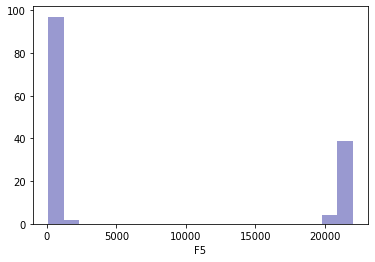

In [45]:
sns.distplot(Audio_Data['F5'],kde=False,color='darkblue',bins=20)

### Applying Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,random_state=rand_state)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [47]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [48]:
pred=clf.predict(X_test)
pred

array([6, 5, 1, 4, 2, 6, 5, 7, 4, 1, 8, 4, 2, 6, 3, 1, 7, 8, 5, 4, 1, 3,
       2], dtype=int64)

### Confusion Matrix

In [49]:
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,7,8,All
True,,,,,,,,,
1,4,0,0,0,0,0,0,0,4
2,0,3,0,0,0,0,0,0,3
3,0,0,2,0,0,0,0,0,2
4,0,0,0,4,0,0,0,0,4
5,0,0,0,0,3,0,0,0,3
6,0,0,0,0,0,3,0,0,3
7,0,0,0,0,0,0,2,0,2
8,0,0,0,0,0,0,0,2,2
All,4,3,2,4,3,3,2,2,23


### Score

In [51]:
clf.score(X_test,y_test)

1.0

### Detection of Singers

#### Original Test Data

Identified Artists:  [1 2 3 4 5 6 7 8]
Artist Count:  [4, 3, 2, 4, 3, 3, 2, 2]


Text(0, 0.5, 'Count ->')

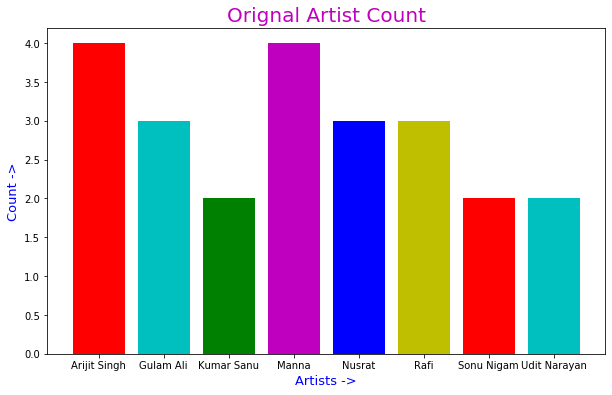

In [55]:
y_test_val=np.array(y_test)
y_test_val_u=np.unique(y_test_val)
cnt=[]
for i in range(len(y_test_val_u)):
    cnt.append(y_test_val.tolist().count(y_test_val_u[i]))
print("Identified Artists: ",y_test_val_u)
print("Artist Count: ",cnt)
plt.figure(figsize=(10,6))
plt.title("Orignal Artist Count",fontsize=20,color="m")
plt.bar(art,cnt,color='rcgmby')
plt.xlabel("Artists ->",fontsize=13,color="b")
plt.ylabel("Count ->",fontsize=13,color="b")

#### Predicted Data

Identified Artists:  [1 2 3 4 5 6 7 8]
Artist Count:  [4, 3, 2, 4, 3, 3, 2, 2]


Text(0, 0.5, 'Count ->')

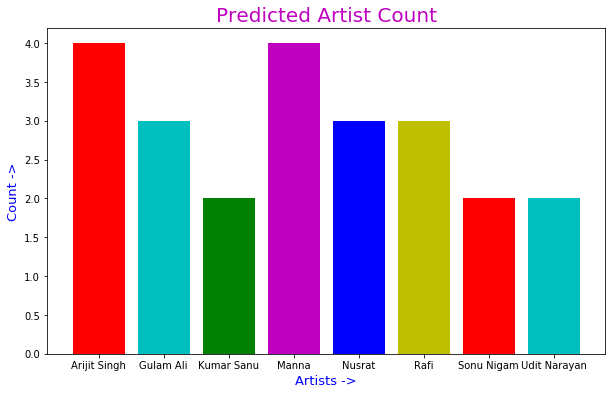

In [56]:
pred_val=np.array(pred)
pred_val_u=np.unique(pred_val)
cnt1=[]
for i in range(len(pred_val_u)):
    cnt1.append(pred_val.tolist().count(pred_val_u[i]))
print("Identified Artists: ",pred_val_u)
print("Artist Count: ",cnt1)
plt.figure(figsize=(10,6))
plt.title("Predicted Artist Count",fontsize=20,color="m")
plt.bar(art,cnt1,color='rcgmby')
plt.xlabel("Artists ->",fontsize=13,color="b")
plt.ylabel("Count ->",fontsize=13,color="b")

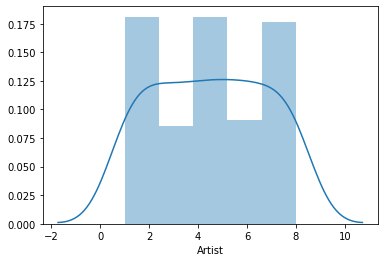

In [57]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=30)
scoring = 'accuracy'
cross_res=[]
for i in range(10):
    results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
    cross_res.append(max(results))
print("10-fold cross validation average accuracy: %.3f" % (max(cross_res)))
print("10-fold cross validation average accuracy: %.3f" % (np.array(cross_res).mean()))

10-fold cross validation average accuracy: 1.000
10-fold cross validation average accuracy: 1.000


### Demo Testing

In [93]:
x=15
freqdata.iloc[x]

F1        21694.6
F2          360.8
F3          366.2
F4          177.7
F5          183.1
           ...   
F64       21764.6
F65         290.8
F66         113.1
F67         306.9
Artist        4.0
Name: 15, Length: 68, dtype: float64

In [94]:
demo_pred=clf.predict([freqdata.drop('Artist',axis=1).iloc[x]])
print(demo_pred[0])
print(art)
print(art_code)
print("Detected Artist: ",art[art_code.index(int(demo_pred[0]))])

4
['Arijit Singh' 'Gulam Ali' 'Kumar Sanu' 'Manna' 'Nusrat' 'Rafi'
 'Sonu Nigam' 'Udit Narayan']
[1, 2, 3, 4, 5, 6, 7, 8]
Detected Artist:  Manna
